In [1]:
from re import X
import numpy
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers.legacy import SGD #using legacy optimizer so
#that we can use lr schedular to show more flexibility in how lr changes overtime
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.constraints import MaxNorm
#from keras import backend as K
#K.set_image_dim_ordering('th')

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# one hot encode outputs
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
num_classes = y_test.shape[1]
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

170498071/170498071 [==============================] - 6s 0us/step
Epoch 1/5
1563/1563 [==============================] - 19s 7ms/step - loss: 1.5360 - accuracy: 0.4478 - val_loss: 1.2400 - val_accuracy: 0.5491
Epoch 2/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2180 - accuracy: 0.5663 - val_loss: 1.0865 - val_accuracy: 0.6200
Epoch 3/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0990 - accuracy: 0.6119 - val_loss: 0.9863 - val_accuracy: 0.6542
Epoch 4/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0298 - accuracy: 0.6364 - val_loss: 0.9521 - val_accuracy: 0.6692
Epoch 5/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9770 - accuracy: 0.6548 - val_loss: 0.9475 - val_accuracy: 0.6705
Accuracy: 67.05%


In [4]:
#2. Predict the first 4 images of the test data using the above model. Then, compare with the actual label for those 4 images to check whether or not the model has predicted correctly
import numpy as np

# Predict the first 4 images of the test data
predictions = model.predict(X_test[:4])
predicted_classes = np.argmax(predictions, axis=1)

# Get the actual labels for the first 4 images
actual_classes = np.argmax(y_test[:4], axis=1)

# Compare the predicted classes with the actual classes
for i in range(4):
    print(f"Image {i+1}:")
    print(f"Predicted: {predicted_classes[i]}, Actual: {actual_classes[i]}")
    print(f"Correct: {predicted_classes[i] == actual_classes[i]}")

1/1 [==============================] - 0s 186ms/step
Image 1:
Predicted: 3, Actual: 3
Correct: True
Image 2:
Predicted: 8, Actual: 8
Correct: True
Image 3:
Predicted: 8, Actual: 8
Correct: True
Image 4:
Predicted: 0, Actual: 0
Correct: True


Epoch 1/5
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9270 - accuracy: 0.6722 - val_loss: 0.8954 - val_accuracy: 0.6881
Epoch 2/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8973 - accuracy: 0.6816 - val_loss: 0.9249 - val_accuracy: 0.6767
Epoch 3/5
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8671 - accuracy: 0.6954 - val_loss: 0.8913 - val_accuracy: 0.6814
Epoch 4/5
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8367 - accuracy: 0.7053 - val_loss: 0.8704 - val_accuracy: 0.6959
Epoch 5/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8109 - accuracy: 0.7137 - val_loss: 0.8753 - val_accuracy: 0.6951


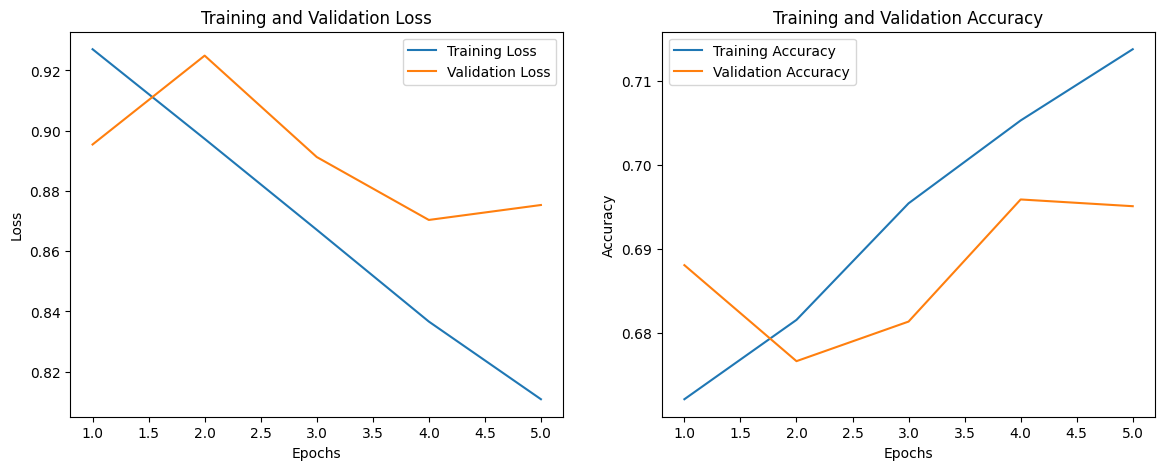

In [5]:
import matplotlib.pyplot as plt
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)


# Extract the loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Define the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Display the plots
plt.show()